In [165]:
%pylab inline
# X = (hours sleeping, hours studying)
# y = Score on test
X = np.array(([3,5], [5,1], [10,2]), dtype=float)
y = np.array(([75],[82],[93]),dtype = float)

Populating the interactive namespace from numpy and matplotlib


In [166]:
X

array([[  3.,   5.],
       [  5.,   1.],
       [ 10.,   2.]])

In [167]:
y

array([[ 75.],
       [ 82.],
       [ 93.]])

In [168]:
X = X/np.amax(X, axis=0)
y = y/100

In [169]:
X , y

(array([[ 0.3,  1. ],
        [ 0.5,  0.2],
        [ 1. ,  0.4]]), array([[ 0.75],
        [ 0.82],
        [ 0.93]]))

In [170]:
print(X.shape, y.shape)

(3, 2) (3, 1)


In [171]:
class NeuralNetwork(object):
    def __init__(self):
        #defining hyperparameters
        self.input_layer_size  = 2
        self.hidden_layer_size = 3
        self.output_layer_size = 1
    
    def forward(self, X):
        # propogate inputs through network
        pass
        

In [172]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [173]:
test_input = np.arange(-6,6,0.01)
test_input

array([-6.  , -5.99, -5.98, ...,  5.97,  5.98,  5.99])

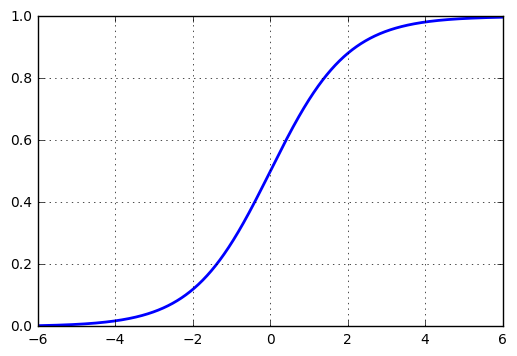

In [174]:
plot(test_input, sigmoid(test_input), linewidth = 2)
grid(1)

In [175]:
sigmoid(0)

0.5

In [176]:
sigmoid(np.random.randn(4,2))

array([[ 0.8153792 ,  0.33165014],
       [ 0.31771091,  0.38473461],
       [ 0.76773618,  0.46251131],
       [ 0.32229987,  0.56399   ]])

In [104]:
class NeuralNetwork(object):
    def __init__(self):
        #defining hyperparameters
        self.input_layer_size  = 2
        self.hidden_layer_size = 3
        self.output_layer_size = 1
        
        self.W1 = np.random.randn(self.input_layer_size, self.hidden_layer_size)
        self.W2 = np.random.randn(self.hidden_layer_size, self.output_layer_size)
    
    def forward(self, X):
        # propogate inputs through network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        y_hat = self.sigmoid(self.z3)
        return y_hat
    
    def sigmoid(self, z):
        return 1/(1 + np.exp(z))
    
    def sigmoidPrime(self, z):
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunctionPrime(self, X, y):
        self.yHat = self.forward(X)
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
    
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)
    
        return dJdW1, dJdW2

    def costFunction(self, X, y):
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        

In [105]:
NN = NeuralNetwork()
yHat = NN.forward(X)
yHat

array([[ 0.79776424],
       [ 0.74062239],
       [ 0.78330442]])

In [106]:
error = y - yHat
print(error,y)


[[-0.04776424]
 [ 0.07937761]
 [ 0.14669558]] [[ 0.75]
 [ 0.82]
 [ 0.93]]


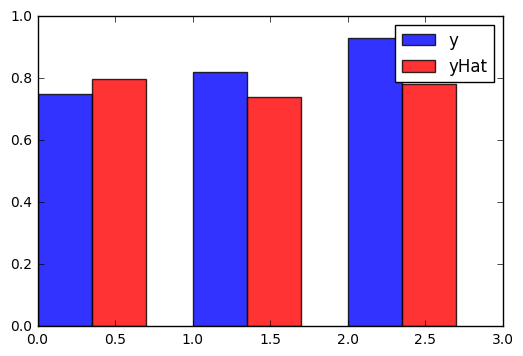

In [107]:
bar([0,1,2], y, width = 0.35, alpha = 0.8)
bar([0.35, 1.35, 2.35],yHat, width =0.35, color='r', alpha = 0.8)
legend(['y', 'yHat'])

In [108]:
def sigmoidPrime(z):
    return np.exp(-z)/((1+np.exp(-z))**2)

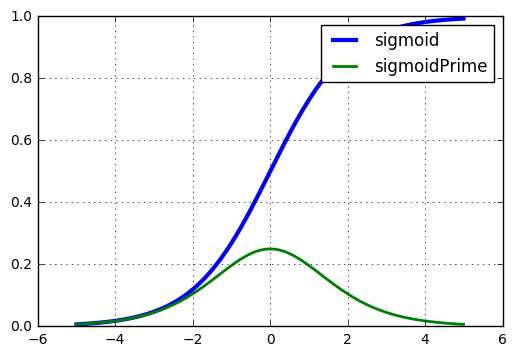

In [109]:
testValues = np.arange(-5,5,0.01)
plot(testValues, sigmoid(testValues), linewidth = 3)
plot(testValues, sigmoidPrime(testValues), linewidth = 2)
grid(1)
legend(['sigmoid', 'sigmoidPrime'])

In [177]:
NN = NeuralNetwork()
cost1 = NN.costFunction(X,y)


AttributeError: 'NeuralNetwork' object has no attribute 'costFunction'

In [178]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)


AttributeError: 'NeuralNetwork' object has no attribute 'costFunctionPrime'

In [112]:
dJdW1

array([[-0.04376926, -0.03354355, -0.09892305],
       [-0.038443  , -0.02830909, -0.05702747]])

In [113]:
dJdW2

array([[-0.12059815],
       [-0.13037561],
       [-0.06063903]])

In [114]:
scalar = 2
NN.W1 = NN.W1 + scalar*dJdW1
NN.W2 = NN.W2 + scalar*dJdW2
cost2 = NN.costFunction(X,y)

In [115]:
print(cost1, cost2)

0.6972306745 0.65977702008


In [116]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)
NN.W1 = NN.W1 - scalar*dJdW1
NN.W2 = NN.W2 - scalar*dJdW2
cost3 = NN.costFunction(X, y)

In [117]:
print(cost1,cost2,cost3)

0.6972306745 0.65977702008 0.704810395651


Below is code developed for gradient checking

In [118]:
def f(x):
    return x**2

In [119]:
epsilon = 1e-4
x = 1.5

In [120]:
numericalGradient = (f(x + epsilon) - f(x-epsilon))/ (2*epsilon)

In [121]:
numericalGradient, 2*x

(2.9999999999996696, 3.0)

In [210]:
class NeuralNetwork(object):
    def __init__(self):
        #defining hyperparameters
        self.input_layer_size  = 2
        self.hidden_layer_size = 3
        self.output_layer_size = 1
        
        self.W1 = np.random.randn(self.input_layer_size, self.hidden_layer_size)
        self.W2 = np.random.randn(self.hidden_layer_size, self.output_layer_size)
    
    def forward(self, X):
        # propogate inputs through network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        y_hat = self.sigmoid(self.z3)
        return y_hat
    
    def sigmoid(self, z):
        return 1/(1 + np.exp(z))
    
    def sigmoidPrime(self, z):
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunctionPrime(self, X, y):
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
    
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)
    
        return dJdW1, dJdW2

    def costFunction(self, X, y):
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
    
    def getParams(self):
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
        
    def setParams(self, params):
        W1_start = 0
        W1_end = self.hidden_layer_size * self.input_layer_size
        self.W1 = np.reshape(params[W1_start:W1_end], (self.input_layer_size, self.hidden_layer_size))
        W2_end = W1_end +  self.hidden_layer_size * self.output_layer_size
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hidden_layer_size, self.output_layer_size))
        
    
    def computeGradient(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))
    

In [236]:
def computeNumericalGradient(N, X, y):
        paramsInitial = N.getParams()
        numgrad = np.zeros(paramsInitial.shape)
        perturb = np.zeros(paramsInitial.shape)
        e = 1e-4

        for p in range(len(paramsInitial)):
            
            perturb[p] = e
            N.setParams(paramsInitial + perturb)
            loss2 = N.costFunction(X, y)
            
            N.setParams(paramsInitial - perturb)
            loss1 = N.costFunction(X, y)

            numgrad[p] = (loss2 - loss1) / (2*e)

            perturb[p] = 0
            
        N.setParams(paramsInitial)

        return numgrad 

In [241]:
NN = NeuralNetwork()

In [242]:
numgrad = computeNumericalGradient(NN, X, y)
numgrad

array([ 0.03066725, -0.00148677,  0.00322747,  0.02115756, -0.00096304,
        0.002089  ,  0.04117619,  0.08640877,  0.07892037])

In [243]:
grad = NN.computeGradient(X,y)
grad

array([ 0.03066725, -0.00148677,  0.00322747,  0.02115756, -0.00096304,
        0.002089  , -0.04117619, -0.08640877, -0.07892037])

In [244]:
norm(grad-numgrad)/norm(grad+numgrad)

3.3084581590560558

In [245]:
print(norm(grad-numgrad),norm(grad+numgrad))

0.248115938276 0.0749944313476
